## List top frequent 20 words of Real news

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [6]:
news_df = pd.read_csv(r"True.csv", sep=',')
news_df.sample(10)

,title,text,subject,date
11556,Peru president vowed to free Fujimori to win s...,LIMA (Reuters) - A congresswoman in Peru said ...,worldnews,"December 22, 2017"
3589,"Exclusive: McConnell frets about healthcare, h...",WASHINGTON (Reuters) - U.S. Senate Majority Le...,politicsNews,"May 24, 2017"
4615,Congress sends White House repeal of broadband...,WASHINGTON (Reuters) - The U.S. House voted on...,politicsNews,"March 28, 2017"
45,Second U.S. judge blocks Trump administration ...,SAN FRANCISCO (Reuters) - A second U.S. judge ...,politicsNews,"December 21, 2017"
8234,"Duterte tells regional leaders, U.S. not to le...",VIENTIANE (Reuters) - Philippines President Ro...,politicsNews,"September 8, 2016"
12056,UK's May to pitch status quo Brexit transition...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"December 18, 2017"
13154,'Kiss of death' to two-state solution if Jerus...,WASHINGTON (Reuters) - A formal U.S. recogniti...,worldnews,"December 4, 2017"
4234,Japan PM urges North Korea to refrain from mor...,TOKYO (Reuters) - Japanese Prime Minister Shin...,politicsNews,"April 17, 2017"
1867,McConnell to support Trump-Democratic deal on ...,WASHINGTON (Reuters) - U.S. Senate Majority Le...,politicsNews,"September 6, 2017"
8322,Veteran Arizona sheriff defeats three in Repub...,PHOENIX (Reuters) - The Arizona sheriff famous...,politicsNews,"August 31, 2016"


In [7]:
vectorizer = CountVectorizer(stop_words='english', min_df=1000, token_pattern=r'[a-zA-Z]{2,}')
matrix = vectorizer.fit_transform(news_df['title']+' '+news_df['text'])
# Sum word counts across all documents
word_counts = matrix.sum(axis=0).tolist()[0]
# Create a list of tuples (word, frequency)
# Use get_feature_names_out() for newer versions of sklearn
features = vectorizer.get_feature_names_out()
word_freq = dict(zip(features, word_counts))
# Sort and get top 20
top_20_freq_items = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
# Display as a Table
df_top20 = pd.DataFrame(top_20_freq_items, columns=['Word', 'Frequency'])
df_top20

,Word,Frequency
0,said,99076
1,trump,60263
2,reuters,29112
3,president,28700
4,state,21691
5,government,19262
6,house,18089
7,new,17792
8,republican,16879
9,states,16812


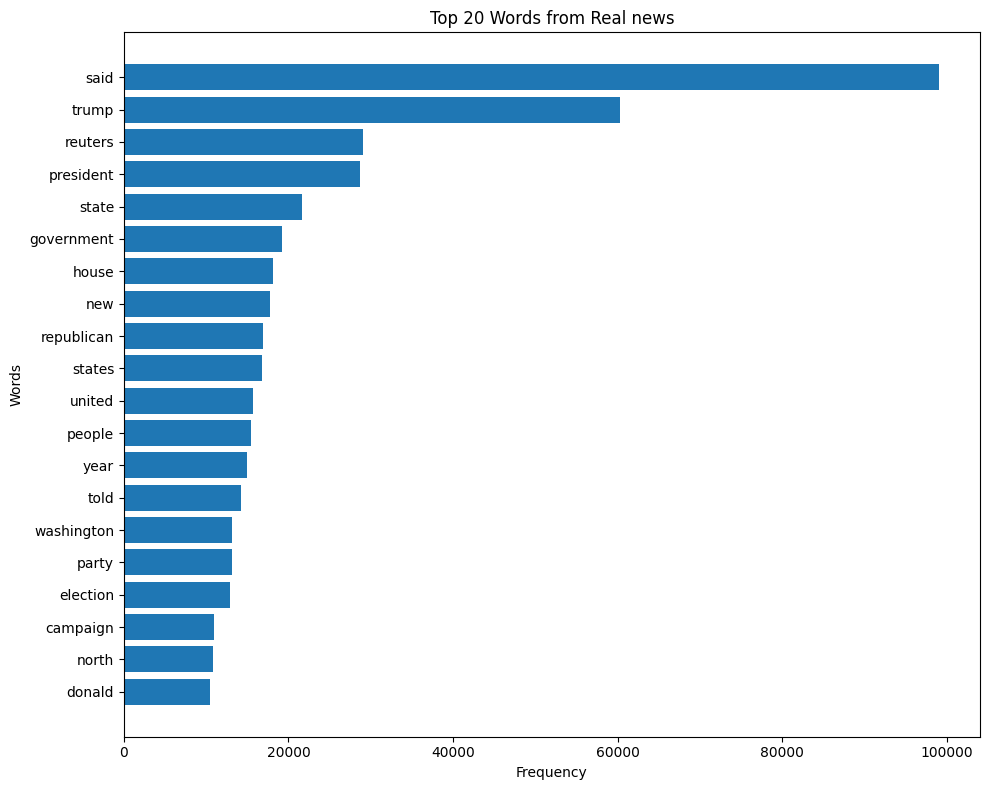

In [8]:
# Create a Bar Plot
plt.figure(figsize=(10, 8))
plt.barh(df_top20['Word'], df_top20['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Words from Real news')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()